In [1]:
import sqlite3
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
gjson = "geojs-100-mun.json"
br = gpd.read_file(gjson)
br = br.drop(columns = 'description')

In [3]:
br['name'] = br['name'].str.title()
br.head()

,id,name,geometry
0,1100015,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.16230 -11.8..."
1,1100023,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754..."
2,1100031,Cabixi,"POLYGON ((-60.39940 -13.45584, -60.40195 -13.4..."
3,1100049,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4..."
4,1100056,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0..."


In [4]:
gjson1 = "pib.json"
pib = gpd.read_file(gjson1)
pib = pib.drop(columns = 'id')

In [5]:
pib = pib.sort_values('nome')
pib['nome'] = pib['nome'].str.title()
pib.head()

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geometry
4229,254,SERGIPE,Arauá,2010,63633.420,12042.0,5284.29,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-37.50771 -11.27151, -37.50658..."
3330,1076,GOIÁS,Abadia De Goiás,2010,38975.133,6301.0,6185.55,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-49.44332 -16.72349, -49.44079..."
3492,2687,MINAS GERAIS,Abadia Dos Dourados,2010,71222.170,6805.0,10466.15,Produto Interno Bruto per capita,9639.65 - 22144.80,2,"MULTIPOLYGON (((-47.42611 -18.16380, -47.42276..."
3976,1077,GOIÁS,Abadiânia,2010,82400.490,13378.0,6159.40,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-48.79594 -16.01553, -48.79546..."
2115,2138,PARÁ,Abaetetuba,2010,456256.940,139819.0,3263.20,Produto Interno Bruto per capita,- 9639.65,1,"MULTIPOLYGON (((-48.80043 -1.60629, -48.79494 ..."


In [6]:
pib['PIB_percapita'] = pib['PIB_percapita'].astype(float)
pib['Pop_est_2009'] = pib['Pop_est_2009'].astype(float)

Text(0.5, 1.0, 'População de cada município do Brasil')

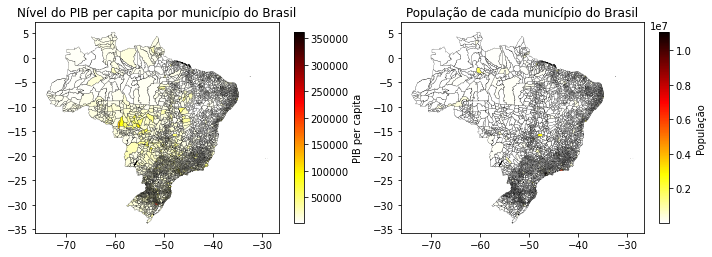

In [7]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
pib.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município do Brasil') 

ax=f.add_subplot(122)
pib.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município do Brasil')

In [8]:
am = pib[pib['UF'] == 'AMAZONAS']

Text(0.5, 1.0, 'População de cada município do Amazonas')

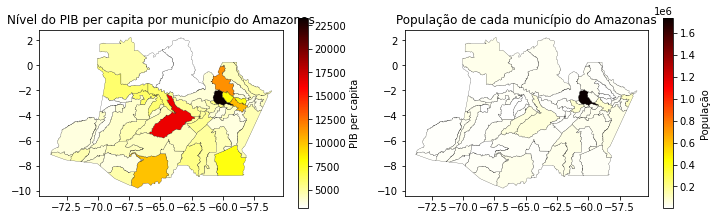

In [9]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
am.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município do Amazonas') 

ax=f.add_subplot(122)
am.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município do Amazonas')

In [10]:
se = pib[pib['UF'] == 'SERGIPE']

Text(0.5, 1.0, 'População de cada município de Sergipe')

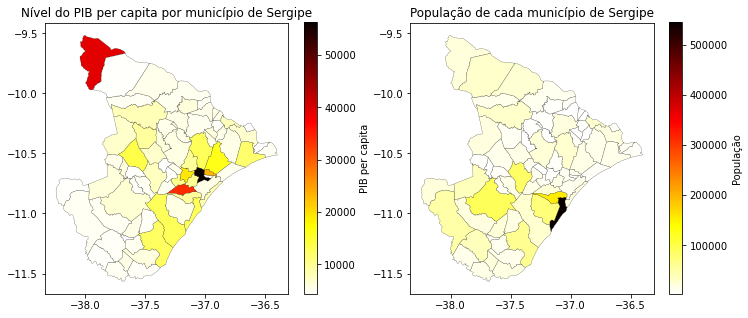

In [11]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
se.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita"})
plt.title('Nível do PIB per capita por município de Sergipe') 

ax=f.add_subplot(122)
se.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População"})
plt.title('População de cada município de Sergipe')

In [12]:
es = pib[pib['UF'] == 'ESPIRITO SANTO']

Text(0.5, 1.0, 'População de cada município do Espiríto Santo')

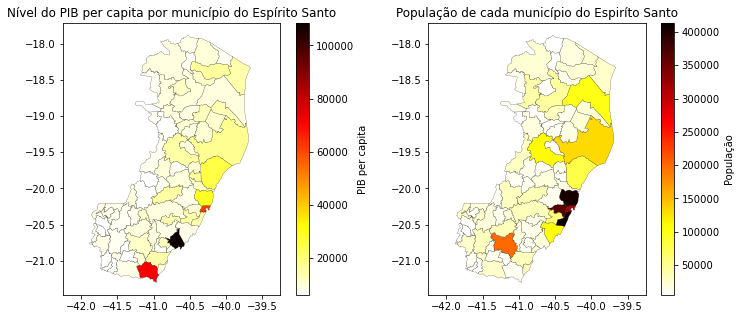

In [13]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
es.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita"})
plt.xlim(-42.25,-39.25)
plt.title('Nível do PIB per capita por município do Espírito Santo') 

ax=f.add_subplot(122)
es.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População"})
plt.xlim(-42.25,-39.25)
plt.title('População de cada município do Espiríto Santo')

In [14]:
go = pib[pib['UF'] == 'GOIÁS']

Text(0.5, 1.0, 'População de cada município de Goiás')

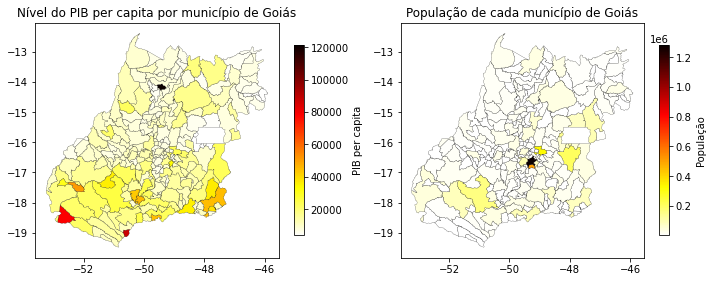

In [15]:
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
go.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Nível do PIB per capita por município de Goiás')

ax=f.add_subplot(122)
go.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})
plt.title('População de cada município de Goiás')

In [16]:
br_a1 = pib[pib['PIB_percapita'] < 10977.027145] #PIB per capita abaixo da média
br_a2 = pib[pib['PIB_percapita'] >= 10977.027145] #PIB per capita acima da média
br_a3 = pib[pib['Pop_est_2009'] < 34405.572763] #População abaixo da média
br_a4 = pib[pib['Pop_est_2009'] >= 34405.572763] #População acima da média

<AxesSubplot:>

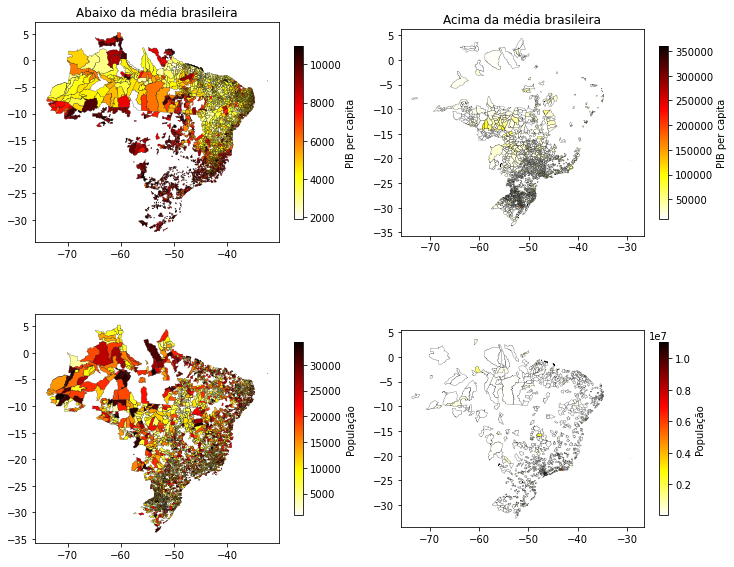

In [17]:
f = plt.figure(figsize=(12,10))

ax=f.add_subplot(221)
br_a1.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Abaixo da média brasileira')

ax=f.add_subplot(222)
br_a2.plot(column='PIB_percapita', cmap='hot_r', legend=True, edgecolor='black',linewidth=0.2,  figsize=(15,8), ax=ax, legend_kwds={'label': "PIB per capita", 'shrink': 0.7})
plt.title('Acima da média brasileira')

ax=f.add_subplot(223)
br_a3.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})

ax=f.add_subplot(224)
br_a4.plot(column='Pop_est_2009', cmap='hot_r', legend=True, edgecolor='black', linewidth=0.2, figsize=(15,8), ax=ax, legend_kwds={'label': "População", 'shrink': 0.7})